# Project 10: Chapter 8: Advanced Data Analysis


## Things we will learn:
1. Working with and managing large sets of data by integrating data from different data sets. 
2. Introduce multi index to facilitate this process. 
Multi index is useful for including identifiers across time and region or principality. 
3. Use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a double index to work with panel data
data to be attached to more than one identifying category. 
We will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period. 


In [2]:
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# index_col = [0,2] will select  countrycode as the primary index and year as 
# the secondary index
data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])

In [5]:
data

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

In [6]:
data.index

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

In [7]:
years = list(set(data.index.get_level_values("year")))
years

[1,
 730,
 1000,
 1150,
 1280,
 1281,
 1282,
 1283,
 1284,
 1285,
 1286,
 1287,
 1288,
 1289,
 1290,
 1291,
 1292,
 1293,
 1294,
 1295,
 1296,
 1297,
 1298,
 1299,
 1300,
 1301,
 1302,
 1303,
 1304,
 1305,
 1306,
 1307,
 1308,
 1309,
 1310,
 1311,
 1312,
 1313,
 1314,
 1315,
 1316,
 1317,
 1318,
 1319,
 1320,
 1321,
 1322,
 1323,
 1324,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1332,
 1333,
 1334,
 1335,
 1336,
 1337,
 1338,
 1339,
 1340,
 1341,
 1342,
 1343,
 1344,
 1345,
 1346,
 1347,
 1348,
 1349,
 1350,
 1351,
 1352,
 1353,
 1354,
 1355,
 1356,
 1357,
 1358,
 1359,
 1360,
 1361,
 1362,
 1363,
 1364,
 1365,
 1366,
 1367,
 1368,
 1369,
 1370,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1394,
 1395,
 1396,
 1397,
 1398,
 1399,
 1400,
 1401,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 14

In [8]:
countries = list(data.groupby("countrycode").mean().index)
countries

['AFG',
 'AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CSK',
 'CUB',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GTM',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDA',
 'MDG',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'POL',
 'PRI',
 'PRK',


## Plot Data By Country

In [9]:
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("USA", "GBR", "ESP", "MEX")]
linestyles = ["-", ":", "--", "-."]

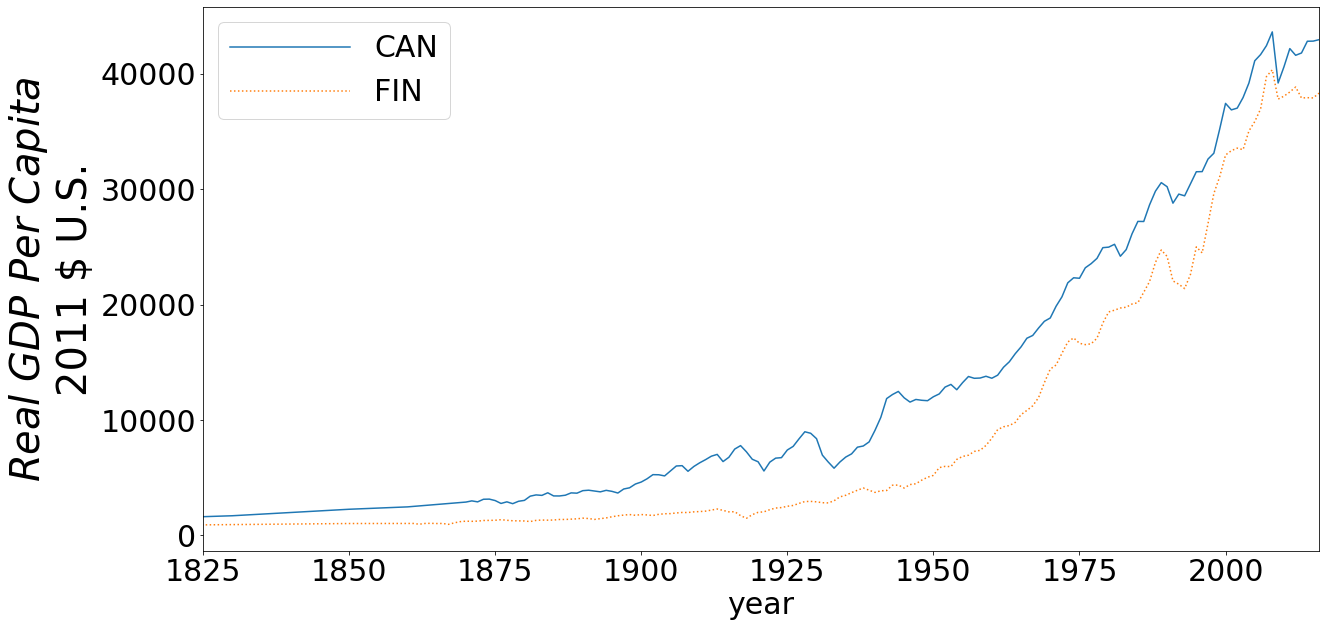

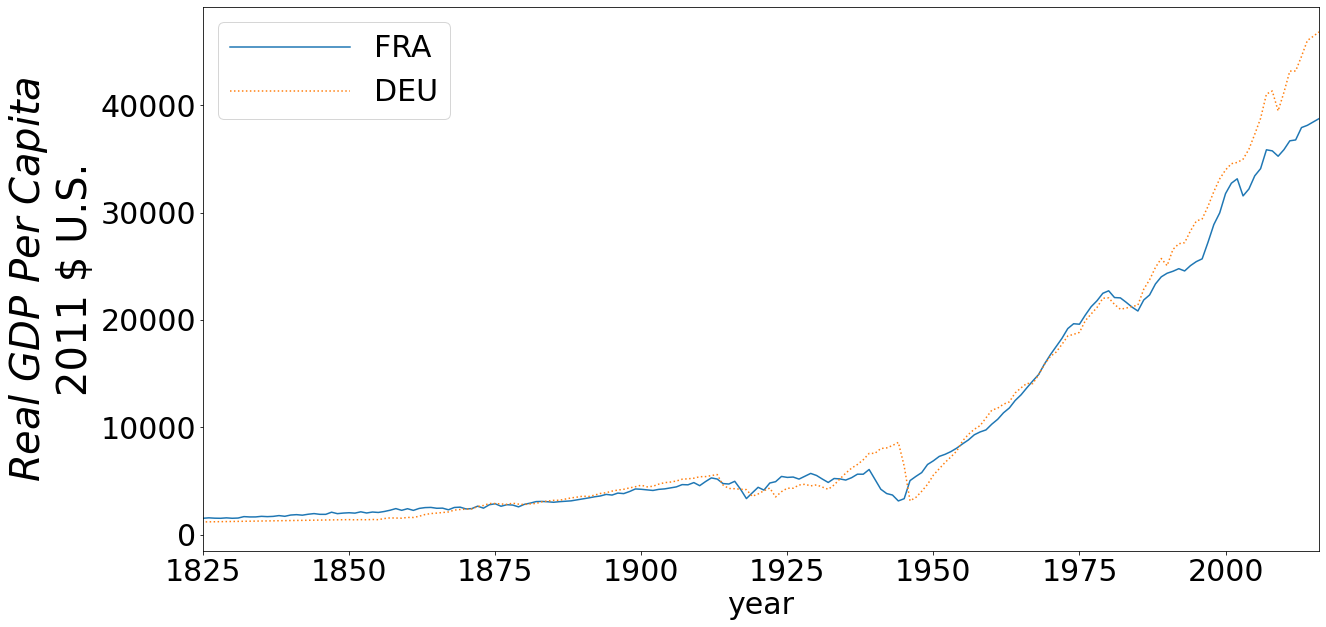

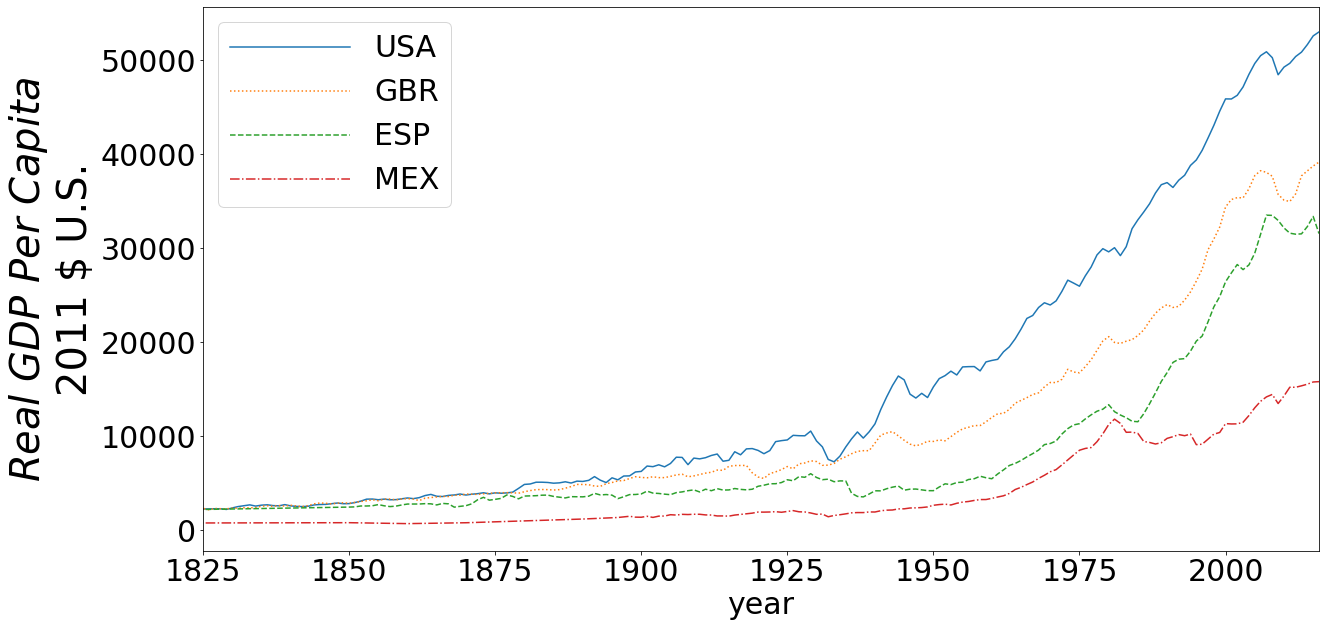

In [10]:
plt.rcParams.update({"legend.fontsize": 30, "legend.handlelength": 4})  
plt.rcParams.update({"font.size": 30})  
for pair in pairs:
    fig, ax = plt.subplots(figsize = (20,10))
    for i in range(len(pair)):
        country = pair[i]
        linestyle = linestyles[i]
        data.loc[country, :]["cgdppc"].dropna(
            ).plot.line(ax = ax,
                       label = country,
                       linestyle = linestyle)
    plt.xlim([1825, max(years)])
    plt.ylabel("$Real$ $GDP$ $Per$ $Capita$\n2011 \$ U.S.",
              fontsize = 40)
    plt.legend()

In [12]:
fraser_data = pd.read_csv("cleanedEconFreedomData.csv",
                         index_col = [0,1],
                         parse_dates = False)
fraser_data = fraser_data.dropna(axis = 0, 
                                 thresh = 1).dropna(
#thresh = 1 is like how = "all"
                                axis=1, thresh = 1) 
fraser_data

EFW  Size Of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom To Trade Internationally  Regulation  
ISO_Code Year                                                             
ALB      2017     9.648271                          8.343863    7.782349  
         2016     9.553657                          8.214900    7.472476  
         2015     9.585625                          8.109118    7.595838  
         2014     9.629320                          8.208630    7.547119  
         2013     9.690942                          7.705771    7.199224  
...                    ...                               ...         ...  
ZWE      2000     2.891166                          3.224735    5.355792  
         1995     4.915293                          5.839664    5.423290  
         1990     5.664840                          4.689623    3.953668  
         1985     6.305850                          3.161743    4.207229  
         1980     6.343342                          3.277015    3.280637  

[3030 rows x 6 columns]

In [13]:
maddison_data = data
fraser_data["RGDP Per Capita"] = maddison_data["rgdpnapc"]
fraser_data

EFW  Size Of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom To Trade Internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP Per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          10342.0  
         2015          10032.0  
         2014           9808.0  
         2013           9660.0  
...                        ...  
ZWE      2000           2249.0  
         1995           2156.0  
         1990           2232.0  
         1985           2198.0  
         1980           2133.0  

[3030 rows x 7 columns]

In [14]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

## Create Indicator Variable

In [35]:
def create_indicator_variable(data, 
                             indicator_name,
                             index_name,
                             target_index_list):
    #prepare column with name of indicator
    data[indicator_name] = 0
    # for each index whose name matches an entry in target_index_list
    #  a 1 will be recorded
#     for index in target_index_list:
        # check if entity index of row matches the entity
        #  from the target_index_list
        #  set value of indicator_name (column) to 1
        #  for all such rows 
    data.loc[target_index_list, [indicator_name]] = int(1)

# Import data with "ISO_Code" and "Year" as index columns  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True) 
# data = fraser_data

In [36]:
# select "ISO_Code" from names of double index
index_name = data.index.names[0]
indicator_name = "North America"
# Cuba, Grenada, Saint Kitts, Saint Lucia, Saint Vincent are missing
countries_in_north_america = [
    "BHS", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]

In [37]:
create_indicator_variable(data = data, 
                          indicator_name = "North America",
                          index_name = index_name, 
                          target_index_list = countries_in_north_america)                

In [38]:
data.loc[countries_in_north_america, ["North America"]]

North America
ISO_Code Year                     
BHS      2017-01-01              1
         2016-01-01              1
         2015-01-01              1
         2014-01-01              1
         2013-01-01              1
...                            ...
USA      1990-01-01              1
         1985-01-01              1
         1980-01-01              1
         1975-01-01              1
         1970-01-01              1

[322 rows x 1 columns]

Text(0.5, 1.0, '2000')

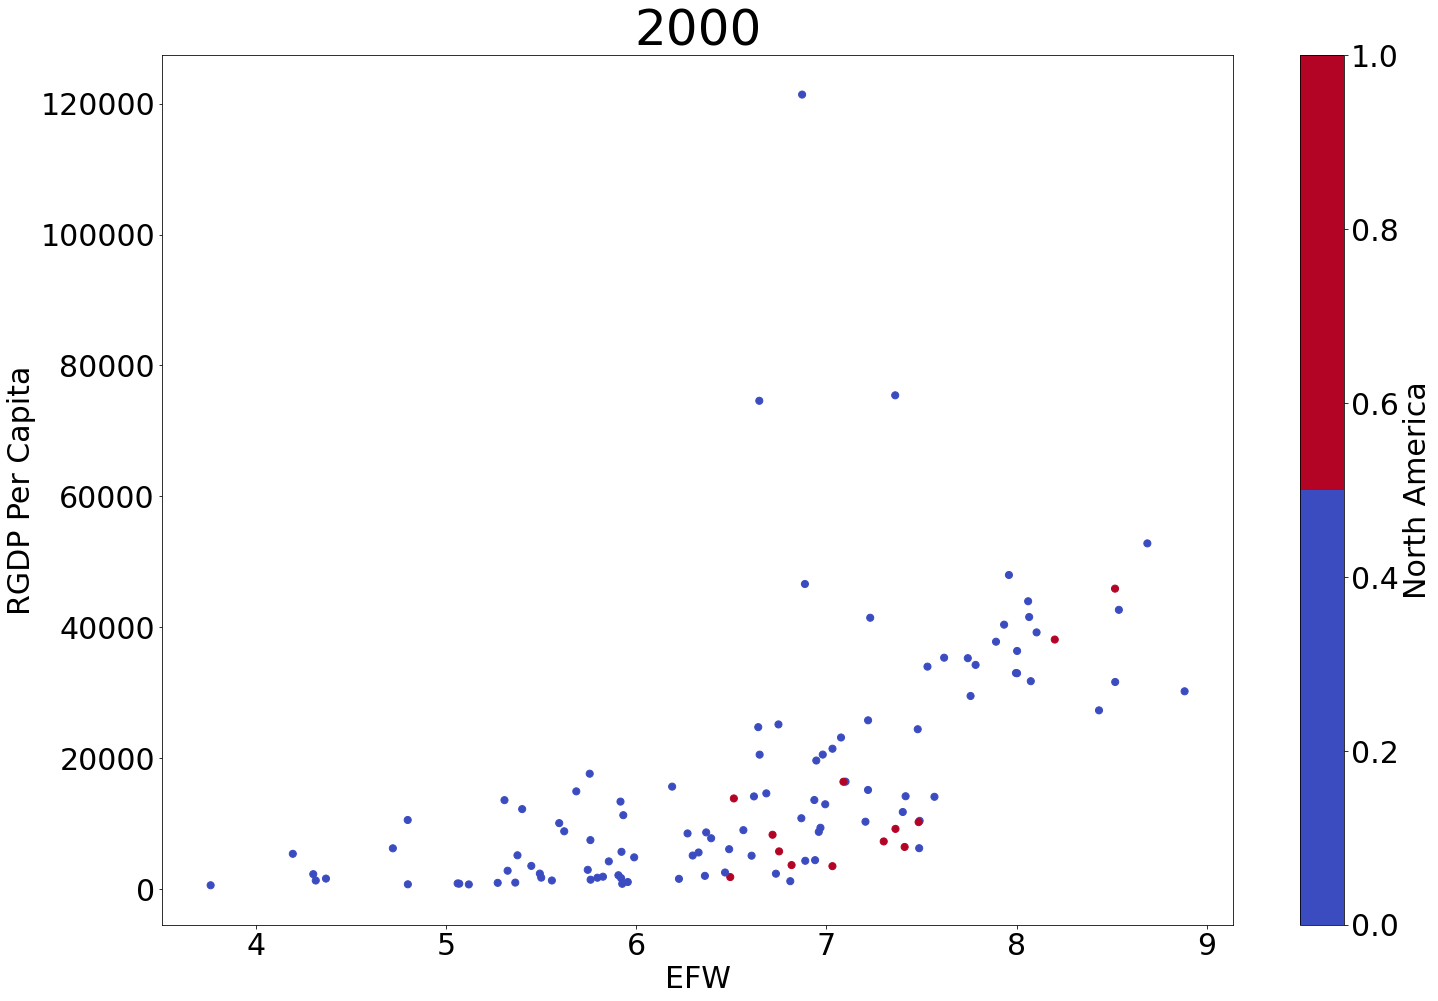

In [39]:
from matplotlib import cm
year = 2000


norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)


plot_data = data[
    data.index.get_level_values("Year") == str(year)]
fig, ax = plt.subplots(figsize = (24,16))
plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "North America",
                      cmap = cmap,
                       norm = norm,
                      ax = ax,
                      s = 50)
ax.set_title(str(year), fontsize = 50)

In [40]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name= quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan
data

EFW  Size Of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom To Trade Internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  North America  RGDP Per Capita 5-tile  
ISO_Code Year                                                                
ALB      2017-01-01              NaN              0                     NaN  
         2016-01-01          10342.0              0                     NaN  
         2015-01-01          10032.0              0                     NaN  
         2014-01-01           9808.0              0                     NaN  
         2013-01-01           9660.0              0                     NaN  
...                              ...            ...                     ...  
ZWE      2000-01-01           2249.0              0                     NaN  
         1995-01-01           2156.0              0                     NaN  
         1990-01-01           2232.0              0                     NaN  
         1985-01-01           2198.0              0                     NaN  
         1980-01-01           2133.0              0                     NaN  

[3030 rows x 9 columns]

In [41]:
def create_quantile(n, 
                    data, 
                    year, 
                    quantile_var, 
                    quantile_name):
    year_index = data.index.get_level_values("Year") == year
    #select the subset of the data frame by year and variable of interest
    year_data = data[year_index][quantile_var]
#     print(year, "quantile(4/5):", data[year_index][quantile_var].quantile(4/n))
    quantile_values_dict = {i:year_data.quantile(i/n) for i in range(1, n + 1)}
    
    for index in data[year_index].index:
        # identify value of the variable of interest
        val = data.loc[index][quantile_var]
        # commpare that value to the values  that divide each quantile
        for i in range(1, n+1):
            if val <= quantile_values_dict[i]:
                data.loc[index, [quantile_name]] = int((n + 1) - i)
                break
            else:
                continue
    
years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, 
                    data, 
                    year, 
                    quantile_var, 
                    quantile_name)

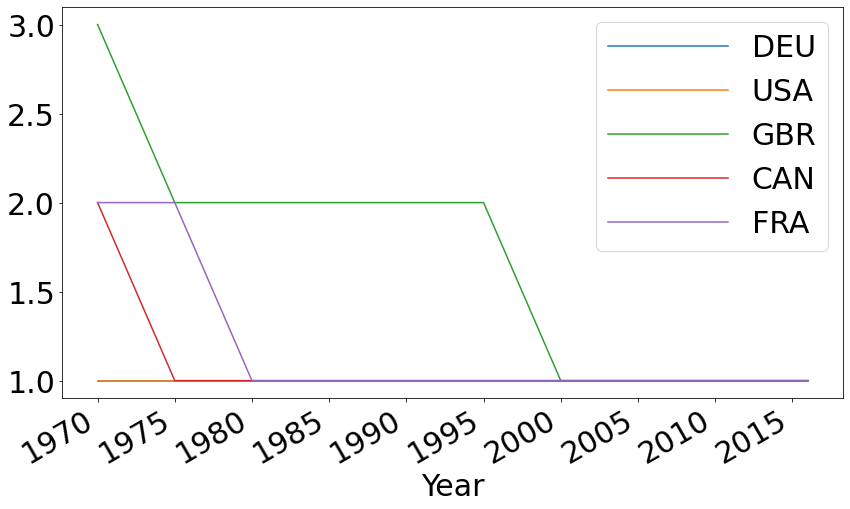

In [42]:
fig, ax = plt.subplots(figsize = (14,8))
for country in ["DEU", "USA","GBR","CAN","FRA"]:
    data.loc[country, "RGDP Per Capita " + str(n) + "-tile"].plot.line(ax = ax, label = country)
plt.legend()

C:\Users\faria\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatter = ax.scatter(


Text(0.5, 1.0, 'Year: 2016')

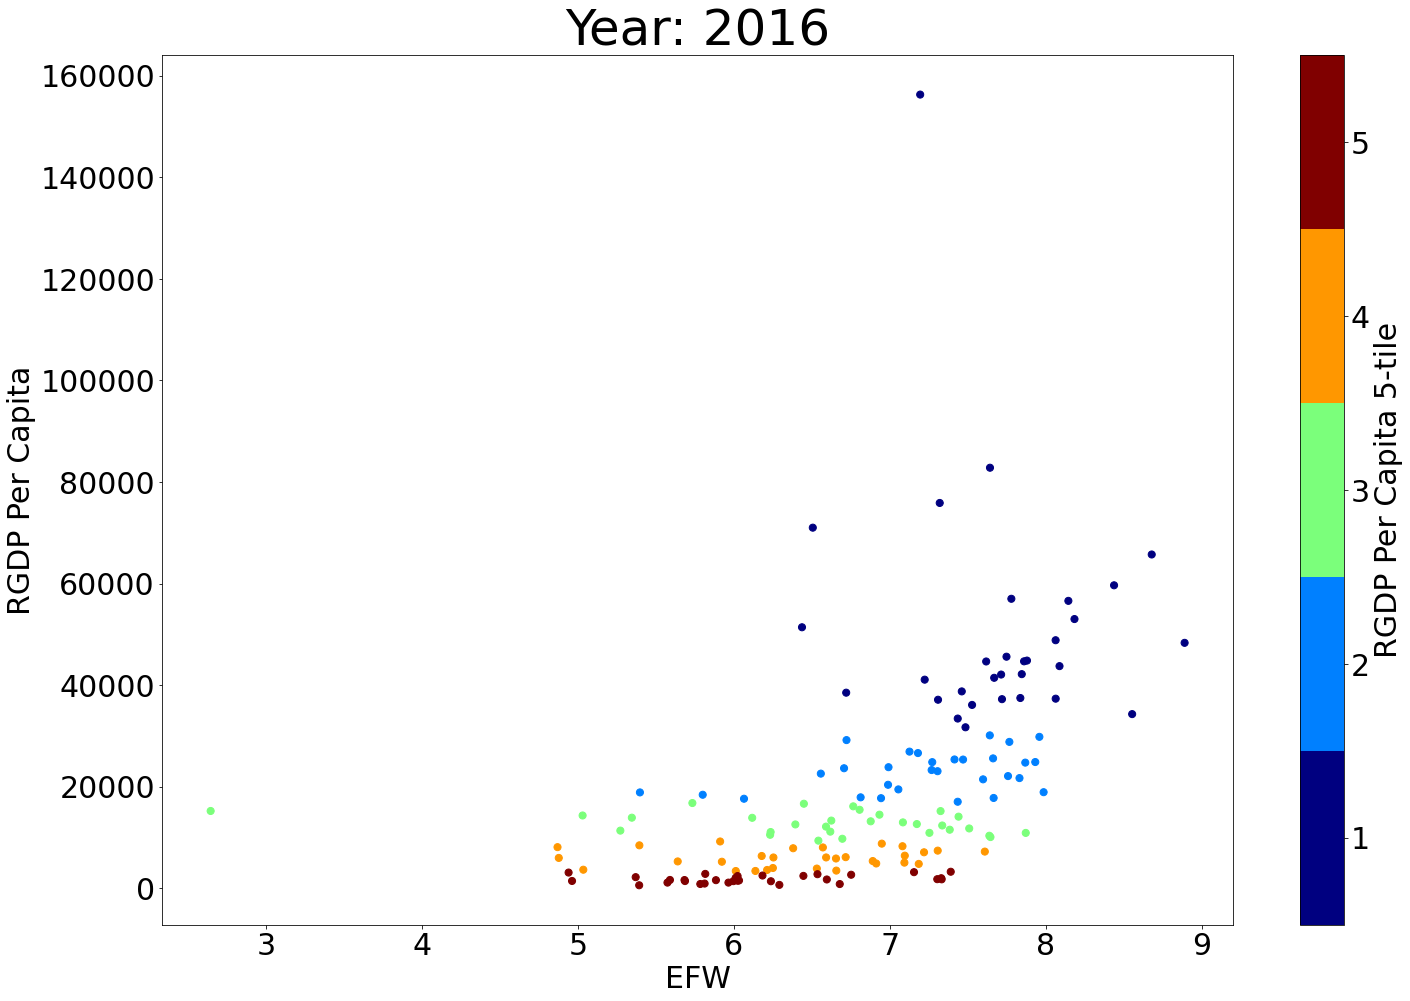

In [43]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime

year = 2016
plot_data =data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24,16))

norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet',n)
plt.cm.ScalarMappable(cmap = cmap, 
                      norm = norm)

plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap,
                      norm = norm,
                      ax = ax,
                      s = 50,
                       vmin = 0.5,
                       vmax = n + 0.5,
                      legend = False)
ax.set_title("Year: " + str(year), fontsize = 50)

In [44]:
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")["RGDP Per Capita"].shift(-1)
data[data.index.get_level_values("Year") > datetime.datetime(2001,1,1,)]

EFW  Size Of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2006-01-01  3.012548            4.770748   
         2005-01-01  2.889240            4.291101   
         2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2006-01-01                        3.572649     0.000000   
         2005-01-01                        3.487611     0.000000   
         2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   

                     Freedom To Trade Internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2006-01-01                          2.299270    4.420073   
         2005-01-01                          2.368615    4.298872   
         2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   

                     RGDP Per Capita  North America  RGDP Per Capita 5-tile  \
ISO_Code Year                                                                 
ALB      2017-01-01              NaN              0                     NaN   
         2016-01-01          10342.0              0                     3.0   
         2015-01-01          10032.0              0                     3.0   
         2014-01-01           9808.0              0                     3.0   
         2013-01-01           9660.0              0                     3.0   
...                              ...            ...                     ...   
ZWE      2006-01-01           1467.0              0                     5.0   
         2005-01-01           1510.0              0                     5.0   
         2004-01-01           1622.0              0                     5.0   
         2003-01-01           1722.0              0                     5.0   
         2002-01-01           2054.0              0                     5.0   

                     RGDP Per Capita Lag  
ISO_Code Year                             
ALB      2017-01-01              10342.0  
         2016-01-01              10032.0  
         2015-01-01               9808.0  
         2014-01-01               9660.0  
         2013-01-01               9592.0  
...                                  ...  
ZWE      2006-01-01               1510.0  
         2005-01-01               1622.0  
         2004-01-01               1722.0  
         2003-01-01               2054.0  
         